In [2]:
import pandas as pd
import math
import numpy as np
from random import randint

import matplotlib.pyplot as plt
import matplotlib

In [4]:
data = pd.read_csv('data_with_features.csv')
data = data.drop('Unnamed: 0', axis=1)

print(data.shape)
data = data[data['avg_spending_previous_weeks']<300]
data = data[data['previous_amount_spent']<500]
data = data[data['SALES_VALUE']<400]

data = data.sort_values('WEEK_NO')

data = data.dropna().reset_index().drop('index',axis=1)


# additional features

noise = np.random.normal(0,1,data.shape[0])
noise

noise2 = np.random.normal(0,1,data.shape[0])
noise2

#time spent on the app's discount section
data['time_spent_on_app'] = (data['SALES_VALUE']/10 - data['previous_amount_spent'] + 3*noise + 400) *0.2
data['time_spent_on_app'] = data['time_spent_on_app'].apply(lambda x: x+100 if x<0 else x)
min_val = int(data['time_spent_on_app'].min())
max_val = int(data['time_spent_on_app'].max())
data['time_spent_on_app'] = data['time_spent_on_app'].apply(lambda x: x+100 if x<(randint(min_val,max_val)*0.3) else x)

# difference in fuel price between this shop and the average in the area
data['difference_fuel_price'] = data['SALES_VALUE']/20 *2*data['Monday %'] + 2*noise2

# data['lower_fake'] = data['SALES_VALUE'].apply(lambda x: x if x<50 else randint(30,70))/20 + 10*noise3 + data['previous_amount_spent']
# data['higher_fake'] = data['SALES_VALUE'].apply(lambda x: x if x>50 else randint(30,70))/20 - 10*noise3

print(data.shape)

(123976, 49)
(31712, 51)


In [5]:
weeks_avgs = pd.DataFrame(data.groupby('WEEK_NO')['difference_fuel_price'].mean()).reset_index()
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price']*10-10
weeks_avgs['difference_fuel_price'] = weeks_avgs['difference_fuel_price'].astype(int)
data = data.merge(weeks_avgs, on='WEEK_NO')
data.rename(columns={'difference_fuel_price_y':'difference_fuel_price'}, inplace=True)
data.drop('difference_fuel_price_x', axis=1, inplace=True)
weeks_avgs.head()

,WEEK_NO,difference_fuel_price
0,10,-5
1,11,10
2,12,2
3,13,0
4,14,-3


In [8]:
columns_to_predict_on = ['AGE_DESC',
       'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults', 'Child Boolean',
                         
       'Monday %', 'Tuesday %', 'Wednesday %', ' Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
                         
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
                         
       'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'previous_amount_spent', 
                         
         'month', 'season', 'month_x', 'month_y', 
            'time_spent_on_app', 'difference_fuel_price']



# columns_to_predict_on = ['Monday %', 'Tuesday %', 'Wednesday %',
#        ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
#        'afternoon %', 'evening %', 'previous_amount_spent',
#          'weeks_since_last_shopping', 'season', 'month_x', 'month_y',
#        'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
#        'avg_spending_previous_weeks_real_time',
#        'std_spending_previous_weeks_real_time',
#        'var_spending_previous_weeks_real_time',
#        'quan25_spending_previous_weeks_real_time',
#        'quan50_spending_previous_weeks_real_time',
#        'quan75_spending_previous_weeks_real_time',
#        'avg_spending_previous_weeks', 'std_spending_previous_weeks',
#        'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
#        'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
#                          'combination_feature_prevAmount','combination_feature_monday']
#                         # 'lower_fake','higher_fake']


In [9]:
data[columns_to_predict_on].head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,Monday %,Tuesday %,...,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,previous_amount_spent,month,season,month_x,month_y,time_spent_on_app,difference_fuel_price
0,45-54,A,25-34K,Homeowner,5.0,3.0,2.0,1.0,0.103265,0.310681,...,9.0,1.0,247.07,247.07,April,spring,0.865927,0.500171,31.846782,-5
1,35-44,A,35-49K,Homeowner,3.0,1.0,2.0,1.0,0.118333,0.117222,...,9.0,1.0,166.56,166.56,April,spring,0.865927,0.500171,47.697669,-5
2,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.119642,0.169288,...,9.0,1.0,167.54,167.54,April,spring,0.865927,0.500171,51.868718,-5
3,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.156460,0.199292,...,9.0,1.0,108.44,108.44,April,spring,0.865927,0.500171,58.071351,-5
4,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.098173,0.120697,...,9.0,1.0,130.38,130.38,April,spring,0.865927,0.500171,55.971572,-5


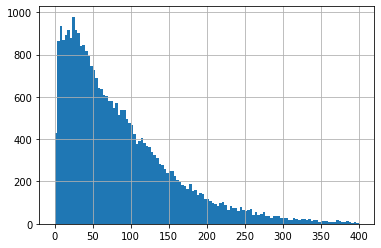

In [10]:
data['SALES_VALUE'].hist(bins=120)

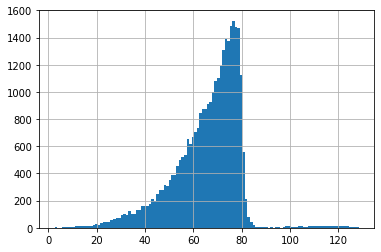

In [11]:
data['time_spent_on_app'].hist(bins=120)

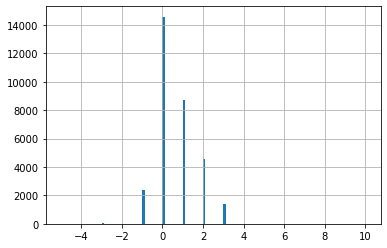

In [12]:
data['difference_fuel_price'].hist(bins=120)

In [13]:
X = data[columns_to_predict_on]

y = data['SALES_VALUE']


In [15]:
X = pd.get_dummies(X)

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

#option 2 - random split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#option 3 - split based on household id
# from sklearn.model_selection import GroupShuffleSplit
# train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 10).split(X, groups=data['household_key']))

# X_train = X.iloc[train_inds]
# y_train = y.iloc[train_inds]
# X_test = X.iloc[test_inds]
# y_test = y.iloc[test_inds]


In [16]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [19]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)



[0]	eval-rmse:65.7846	train-rmse:61.8498
[1]	eval-rmse:57.0593	train-rmse:53.63
[2]	eval-rmse:54.8145	train-rmse:51.1691
[3]	eval-rmse:51.8306	train-rmse:48.2787
[4]	eval-rmse:49.5187	train-rmse:45.9609
[5]	eval-rmse:46.339	train-rmse:42.4693
[6]	eval-rmse:44.269	train-rmse:40.2314
[7]	eval-rmse:42.5561	train-rmse:38.3855
[8]	eval-rmse:42.2108	train-rmse:37.3652
[9]	eval-rmse:42.1468	train-rmse:37.1051
[10]	eval-rmse:42.5337	train-rmse:36.661
[11]	eval-rmse:42.1162	train-rmse:36.0567
[12]	eval-rmse:41.888	train-rmse:35.7342
[13]	eval-rmse:41.0063	train-rmse:35.0072
[14]	eval-rmse:40.7854	train-rmse:34.7814
[15]	eval-rmse:40.6436	train-rmse:34.4551
[16]	eval-rmse:40.2795	train-rmse:34.0001
[17]	eval-rmse:40.2193	train-rmse:33.8926
[18]	eval-rmse:39.3894	train-rmse:32.8963
[19]	eval-rmse:39.431	train-rmse:32.6331


In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 28.66369169947441
mean squared error: 1554.8038468326936
root mean squared error: 39.431001088391014
R2: 0.712349407737627


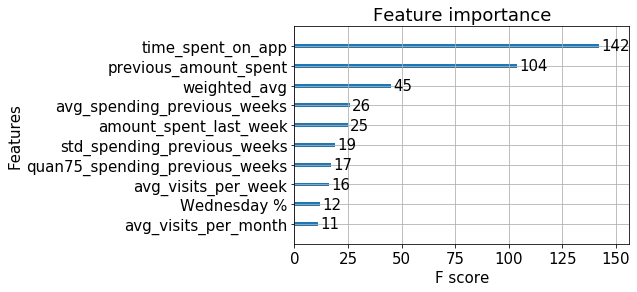

In [21]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=10)

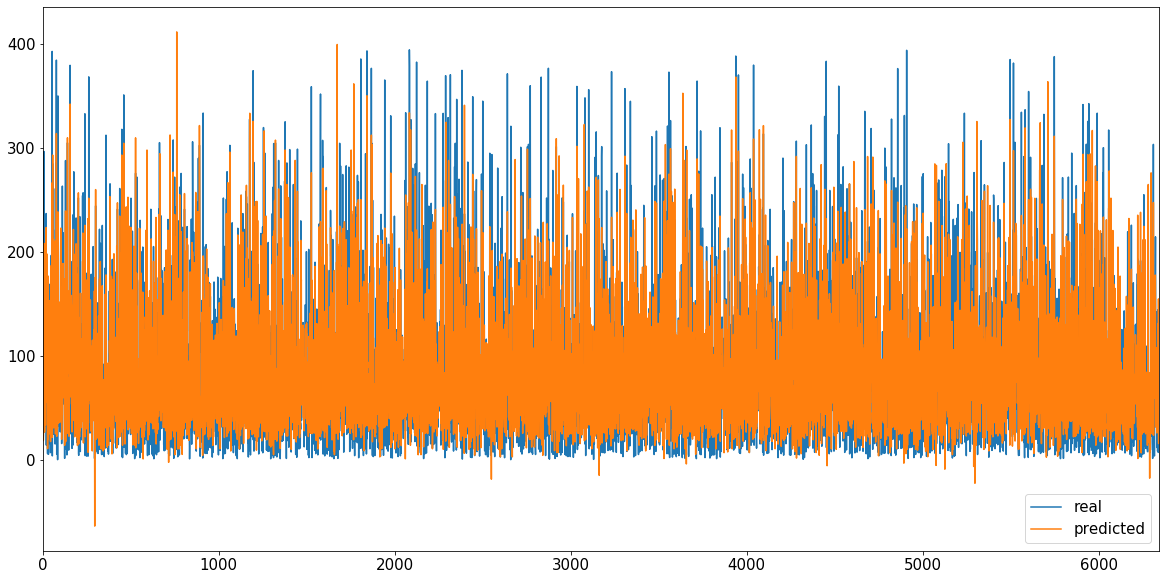

In [22]:
results = pd.DataFrame({ 'real':y_test, 'predicted':preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1)#.head(1000)
results.plot(figsize=(20,10))

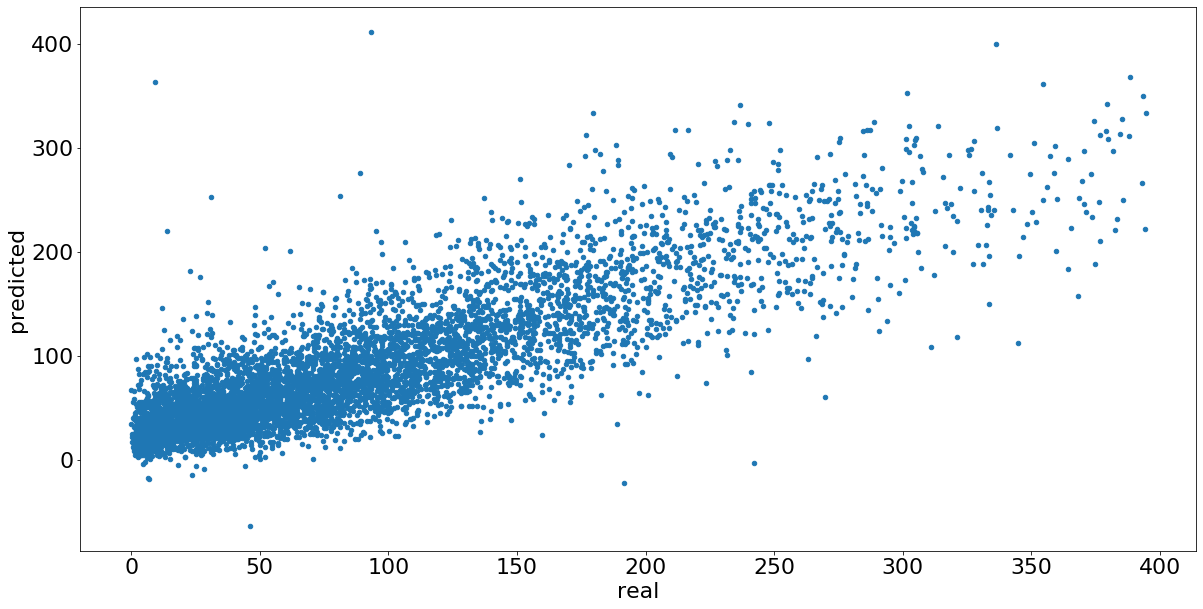

In [23]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')

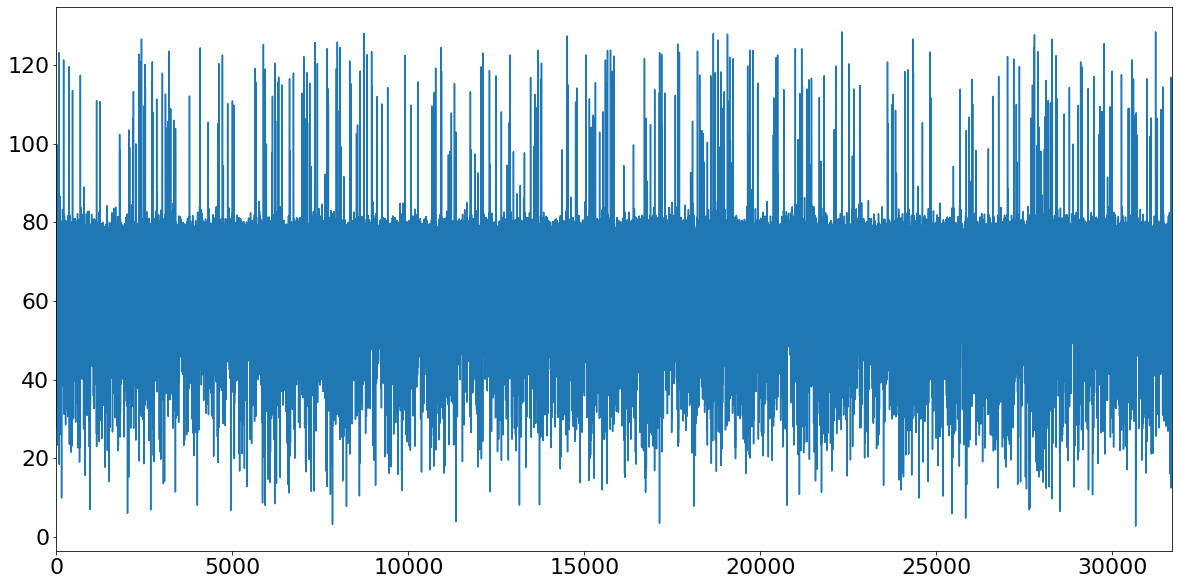

In [24]:
(data['time_spent_on_app']).plot(figsize=(20,10))

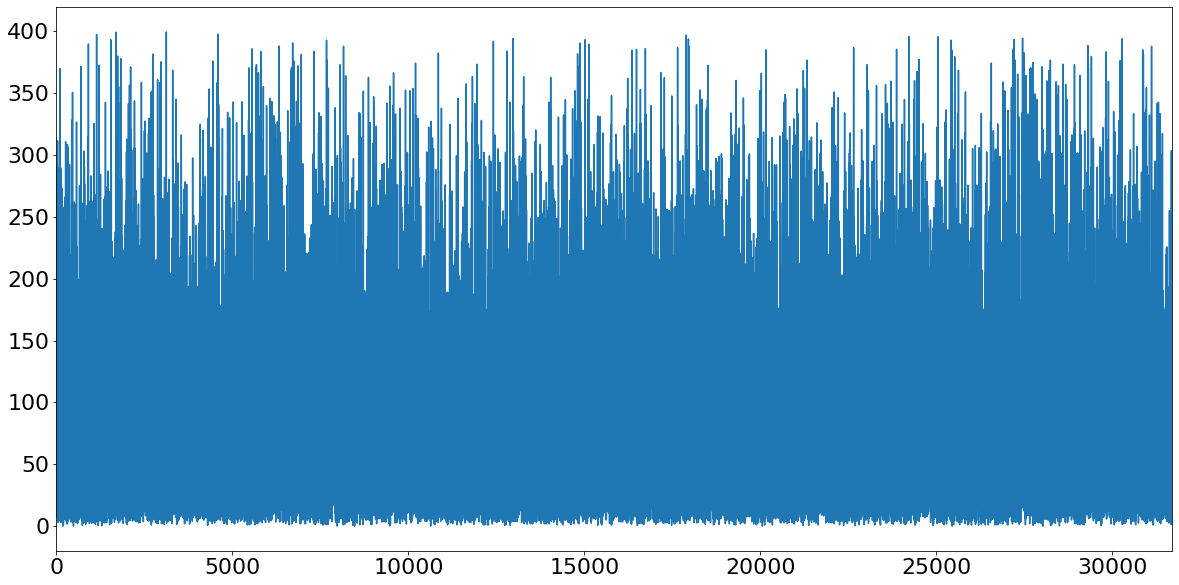

In [25]:
data['SALES_VALUE'].plot(figsize=(20,10))

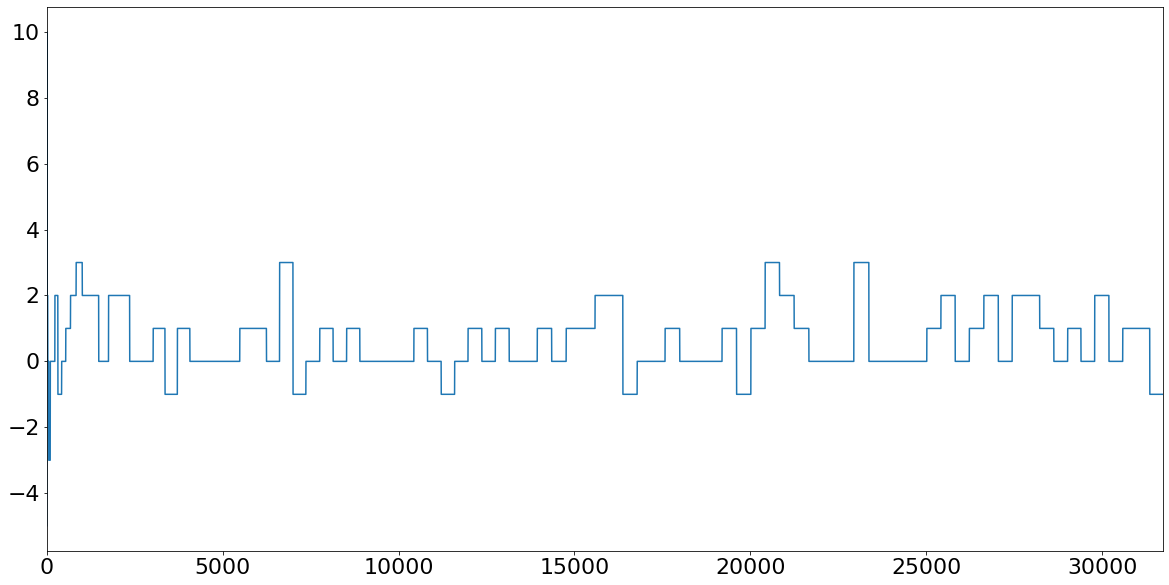

In [26]:
data['difference_fuel_price'].plot(figsize=(20,10))